
## **Detection of Cracks on Concrete Surfaces Utilizing Convolutional Neural Networks (CNNs) and OpenCV for Preprocessing**


## Project Overview

The project endeavors to tackle the exigent requirement for an efficient and automated system designed to identify surface cracks across diverse infrastructural and industrial environments. Through the synergistic utilization of OpenCV and Convolutional Neural Networks (CNN), this endeavor aims to transform conventional methodologies of crack detection, presenting an enhanced paradigm that is characterized by heightened accuracy, promptness, and proactive intervention. The amalgamation of OpenCV's prowess in computer vision with CNN's proficiency in deep learning not only streamlines the process of surface crack detection but also furnishes a solution that is both scalable and adaptable to real-world scenarios.

The **goal** of this project is to develop a Deep Learning CNN model capable of effectively detecting the presence of cracks in images of concrete surfaces.

## Data Description:
The dataset utilized for this project was obtained from Kaggle, accessible through the link: https://www.kaggle.com/datasets/arunrk7/surface-crack-detection/. This dataset comprises images categorized into two classes: images with cracks and images without cracks. Each class consists of 20,000 images. The images are standardized to 227x227 pixels with RGB channels. This dataset serves as the foundation for training and evaluating the performance of the developed model.

# 1 - Use color images to develop CNN predictive Model for detecting cracks in concrete

## Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q keras
import keras

In [ ]:
! unzip '/content/drive/MyDrive/605 NLP and CNN Projects/ConcreteImages.zip'


Streaming output truncated to the last 5000 lines.
  inflating: Positive/15001_1.jpg    
  inflating: Positive/15002_1.jpg    
  inflating: Positive/15003_1.jpg    
  inflating: Positive/15004_1.jpg    
  inflating: Positive/15005_1.jpg    
  inflating: Positive/15006_1.jpg    
  inflating: Positive/15007_1.jpg    
  inflating: Positive/15008_1.jpg    
  inflating: Positive/15009_1.jpg    
  inflating: Positive/15010_1.jpg    
  inflating: Positive/15011_1.jpg    
  inflating: Positive/15012_1.jpg    
  inflating: Positive/15013_1.jpg    
  inflating: Positive/15014_1.jpg    
  inflating: Positive/15015_1.jpg    
  inflating: Positive/15016_1.jpg    
  inflating: Positive/15017_1.jpg    
  inflating: Positive/15018_1.jpg    
  inflating: Positive/15019_1.jpg    
  inflating: Positive/15020_1.jpg    
  inflating: Positive/15021_1.jpg    
  inflating: Positive/15022_1.jpg    
  inflating: Positive/15023_1.jpg    
  inflating: Positive/15024_1.jpg    
  inflating: Positive/15025_1.jpg    

## View Data and Save image data and labels in numpy arrays

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read in one image and display

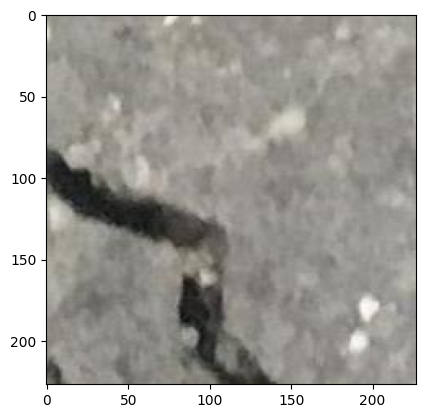

In [ ]:
img = cv2.imread('Positive/15000_1.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
img.shape

(227, 227, 3)

Load Images with Cracks (resize to 64x64)

In [ ]:
img_size = 64
cracks_data = []
path = '/content/Positive'
class_num = 1
for img in os.listdir(path):
  try:
    img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
    resized_arr = cv2.resize(img_arr, (img_size, img_size))
    cracks_data.append([resized_arr, class_num])
  except Exception as e:
    print(e)

cracks_data = np.array(cracks_data)

<ipython-input-7-d4e81b2a7a20>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cracks_data = np.array(cracks_data)


Load Images without Cracks

In [ ]:
img_size = 64
no_cracks_data = []
path = '/content/Negative'
class_num = 0
for img in os.listdir(path):
  try:
    img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
    resized_arr = cv2.resize(img_arr, (img_size, img_size))
    no_cracks_data.append([resized_arr, class_num])
  except Exception as e:
    print(e)

no_cracks_data = np.array(no_cracks_data)

<ipython-input-8-7fd16a27fdda>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  no_cracks_data = np.array(no_cracks_data)


In [ ]:
#Split Image Data from Label Data
crack_images = cracks_data[:,0]
crack_labels = cracks_data[:,-1]
no_crack_images = no_cracks_data[:,0]
no_crack_labels = no_cracks_data[:,-1]

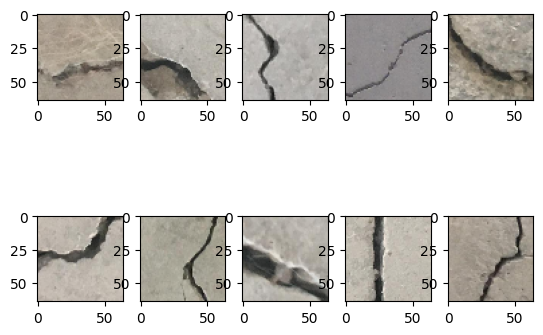

In [ ]:
#display Last 10 images with cracks
for i in range(19990,20000):
  plt.subplot(2, 5, i-19989)
  plt.imshow(cv2.cvtColor(crack_images[i], cv2.COLOR_BGR2RGB))

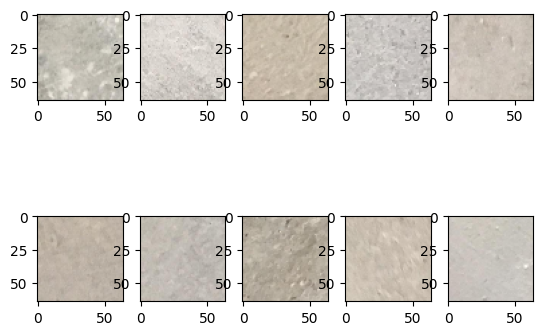

In [ ]:
#display Last 10 images without cracks
for i in range(19990,20000):
  plt.subplot(2, 5, i-19989)
  plt.imshow(cv2.cvtColor(no_crack_images[i], cv2.COLOR_BGR2RGB))

In [ ]:
img_data = np.concatenate((crack_images,no_crack_images))

In [ ]:
img_labels = np.concatenate((crack_labels,no_crack_labels))

In [ ]:
img_data.shape

(40000,)

## Prepare Data for Training

In [ ]:
#Target Label Text Descriptions
class_names = ['No Cracks', 'Cracked']

In [ ]:
from sklearn.model_selection import train_test_split
#Split into train/test
X_train, X_test, y_train, y_test = train_test_split(img_data, img_labels, test_size=0.2, random_state=43, stratify=img_labels)

In [ ]:
len(y_test)

8000

In [ ]:
pd.Series(y_test).value_counts()

1    4000
0    4000
dtype: int64

In [ ]:
X_train.shape

(32000,)

In [ ]:
X_test.shape

(8000,)

In [ ]:
X_train[0].shape

(64, 64, 3)

In [ ]:
x = []
for i in X_train:
  x.append(i)

X_train = np.array(x)
X_train.shape

(32000, 64, 64, 3)

In [ ]:
x = []
for i in X_test:
  x.append(i)

X_test = np.array(x)
X_test.shape

(8000, 64, 64, 3)

In [ ]:
y = []
for i in y_train:
  y.append(i)

y_train = np.array(y)
y_train.shape

(32000,)

In [ ]:
y = []
for i in y_test:
  y.append(i)

y_test = np.array(y)
y_test.shape

(8000,)

In [ ]:
#normalize data scaling values from 0-1
X_train = X_train/255
X_test = X_test/255

##Apply ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(64,64,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 14s 9ms/step - loss: 0.6345 - accuracy: 0.6676
Epoch 2/5
1000/1000 [==============================] - 10s 10ms/step - loss: 0.5159 - accuracy: 0.7485
Epoch 3/5
1000/1000 [==============================] - 10s 10ms/step - loss: 0.4589 - accuracy: 0.7922
Epoch 4/5
1000/1000 [==============================] - 9s 9ms/step - loss: 0.4253 - accuracy: 0.8127
Epoch 5/5
1000/1000 [==============================] - 10s 10ms/step - loss: 0.3756 - accuracy: 0.8389


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

250/250 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      4000
           1       0.98      0.78      0.87      4000

    accuracy                           0.88      8000
   macro avg       0.90      0.88      0.88      8000
weighted avg       0.90      0.88      0.88      8000



## Basic CNN (1 convolutional layer, 2 connected layers)

In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64,3)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 113s 111ms/step - loss: 0.6963 - accuracy: 0.5018
Epoch 2/5
1000/1000 [==============================] - 105s 105ms/step - loss: 0.6932 - accuracy: 0.5001
Epoch 3/5
1000/1000 [==============================] - 105s 105ms/step - loss: 0.6932 - accuracy: 0.5014
Epoch 4/5
1000/1000 [==============================] - 104s 104ms/step - loss: 0.6932 - accuracy: 0.4981
Epoch 5/5
1000/1000 [==============================] - 108s 108ms/step - loss: 0.6932 - accuracy: 0.5002


In [ ]:
cnn.evaluate(X_test,y_test)

250/250 [==============================] - 9s 35ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932529211044312, 0.5]

In [ ]:
y_pred = cnn.predict(X_test)

250/250 [==============================] - 9s 35ms/step


In [ ]:
y_predicted_classes = [np.argmax(element) for element in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_predicted_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      4000
           1       0.00      0.00      0.00      4000

    accuracy                           0.50      8000
   macro avg       0.25      0.50      0.33      8000
weighted avg       0.25      0.50      0.33      8000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test, y_predicted_classes)

import plotly.express as px
fig = px.imshow(cm, text_auto=True, title='Confusion Matrix: Concrete Crack Prediction')
fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual")

This model is predicting all images as No Crack. We will make the model more complex to improve this.

##CNN (2 Convolutional Layers, 2 Connected Layers)

In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64,3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 213s 212ms/step - loss: 0.0722 - accuracy: 0.9755
Epoch 2/5
1000/1000 [==============================] - 212s 213ms/step - loss: 0.0371 - accuracy: 0.9883
Epoch 3/5
1000/1000 [==============================] - 217s 217ms/step - loss: 0.0312 - accuracy: 0.9900
Epoch 4/5
1000/1000 [==============================] - 213s 213ms/step - loss: 0.0220 - accuracy: 0.9927
Epoch 5/5
1000/1000 [==============================] - 209s 209ms/step - loss: 0.0178 - accuracy: 0.9941


In [ ]:
cnn.evaluate(X_test,y_test)

250/250 [==============================] - 15s 61ms/step - loss: 0.0175 - accuracy: 0.9944


[0.0175083689391613, 0.9943749904632568]

In [ ]:
y_pred = cnn.predict(X_test)

250/250 [==============================] - 15s 58ms/step


In [ ]:
y_predicted_classes = [np.argmax(element) for element in y_pred]

In [ ]:
def plot_sample_predicted(index):
    plt.figure(figsize = (15,2))
    img = np.uint8(X_test[index]*255)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.xlabel(f'Actual Class: {class_names[y_test[index]]}')
    plt.ylabel(f'Predicted Class: {class_names[y_predicted_classes[index]]}')

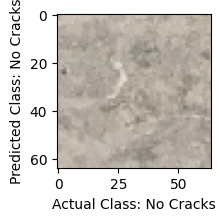

In [ ]:
plot_sample_predicted(2753)

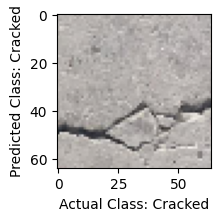

In [ ]:
plot_sample_predicted(7900)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_predicted_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4000
           1       1.00      0.99      0.99      4000

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000



In [ ]:
cm = confusion_matrix(y_test, y_predicted_classes)

import plotly.express as px
fig = px.imshow(cm, text_auto=True, title='Confusion Matrix: Concrete Crack Prediction')
fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual")

##CNN (3 Convolutional Layers, 2 Connected Layers)

In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(64, 64,3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')   #softmax normilized the probability
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 137s 136ms/step - loss: 0.0644 - accuracy: 0.9793
Epoch 2/5
1000/1000 [==============================] - 137s 137ms/step - loss: 0.0342 - accuracy: 0.9890
Epoch 3/5
1000/1000 [==============================] - 140s 140ms/step - loss: 0.0239 - accuracy: 0.9919
Epoch 4/5
1000/1000 [==============================] - 139s 139ms/step - loss: 0.0161 - accuracy: 0.9945
Epoch 5/5
1000/1000 [==============================] - 143s 143ms/step - loss: 0.0139 - accuracy: 0.9956


In [ ]:
cnn.evaluate(X_test,y_test)

250/250 [==============================] - 11s 44ms/step - loss: 0.0106 - accuracy: 0.9967


[0.010601264424622059, 0.996749997138977]

In [ ]:
y_pred = cnn.predict(X_test)

250/250 [==============================] - 12s 48ms/step


In [ ]:
y_predicted_classes = [np.argmax(element) for element in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_predicted_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00      4000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [ ]:
cm = confusion_matrix(y_test, y_predicted_classes)

import plotly.express as px
fig = px.imshow(cm, text_auto=True, title='Confusion Matrix: Concrete Crack Prediction')
fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual")

##CNN (3 Convolutional Layers, 3 Connected Layers)

In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(64, 64,3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')   #softmax normilized the probability
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 131s 129ms/step - loss: 0.0740 - accuracy: 0.9743
Epoch 2/5
1000/1000 [==============================] - 127s 127ms/step - loss: 0.0359 - accuracy: 0.9878
Epoch 3/5
1000/1000 [==============================] - 144s 144ms/step - loss: 0.0263 - accuracy: 0.9908
Epoch 4/5
1000/1000 [==============================] - 130s 130ms/step - loss: 0.0221 - accuracy: 0.9928
Epoch 5/5
1000/1000 [==============================] - 125s 125ms/step - loss: 0.0195 - accuracy: 0.9937


In [ ]:
cnn.evaluate(X_test,y_test)

250/250 [==============================] - 12s 46ms/step - loss: 0.0195 - accuracy: 0.9937


[0.019531909376382828, 0.9937499761581421]

In [ ]:
y_pred = cnn.predict(X_test)

250/250 [==============================] - 8s 31ms/step


In [ ]:
y_predicted_classes = [np.argmax(element) for element in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_predicted_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4000
           1       1.00      0.99      0.99      4000

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000



In [ ]:
cm = confusion_matrix(y_test, y_predicted_classes)

import plotly.express as px
fig = px.imshow(cm, text_auto=True, title='Confusion Matrix: Concrete Crack Prediction')
fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual")

##CNN (4 Convolutional Layers, 2 Connected Layers)

In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(64, 64,3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')   #softmax normilized the probability
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 147s 145ms/step - loss: 0.0635 - accuracy: 0.9790
Epoch 2/5
1000/1000 [==============================] - 135s 135ms/step - loss: 0.0329 - accuracy: 0.9896
Epoch 3/5
1000/1000 [==============================] - 131s 131ms/step - loss: 0.0225 - accuracy: 0.9929
Epoch 4/5
1000/1000 [==============================] - 139s 139ms/step - loss: 0.0156 - accuracy: 0.9957
Epoch 5/5
1000/1000 [==============================] - 143s 143ms/step - loss: 0.0117 - accuracy: 0.9963


In [ ]:
cnn.evaluate(X_test,y_test)

250/250 [==============================] - 12s 48ms/step - loss: 0.0181 - accuracy: 0.9944


[0.01813950203359127, 0.9943749904632568]

In [ ]:
y_pred = cnn.predict(X_test)

250/250 [==============================] - 8s 32ms/step


In [ ]:
y_predicted_classes = [np.argmax(element) for element in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_predicted_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4000
           1       1.00      0.99      0.99      4000

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000



In [ ]:
cm = confusion_matrix(y_test, y_predicted_classes)

import plotly.express as px
fig = px.imshow(cm, text_auto=True, title='Confusion Matrix: Concrete Crack Prediction')
fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual")

##CNN (4 Convolutional Layers, 3 Connected Layers)

In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(64, 64,3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')   #softmax normilized the probability
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 158s 156ms/step - loss: 0.0669 - accuracy: 0.9763
Epoch 2/5
1000/1000 [==============================] - 164s 164ms/step - loss: 0.0356 - accuracy: 0.9889
Epoch 3/5
1000/1000 [==============================] - 133s 133ms/step - loss: 0.0231 - accuracy: 0.9925
Epoch 4/5
1000/1000 [==============================] - 137s 137ms/step - loss: 0.0147 - accuracy: 0.9955
Epoch 5/5
1000/1000 [==============================] - 132s 132ms/step - loss: 0.0117 - accuracy: 0.9961


In [ ]:
cnn.evaluate(X_test,y_test)

250/250 [==============================] - 9s 36ms/step - loss: 0.0122 - accuracy: 0.9970


[0.012213378213346004, 0.996999979019165]

In [ ]:
y_pred = cnn.predict(X_test)

250/250 [==============================] - 11s 42ms/step


In [ ]:
y_predicted_classes = [np.argmax(element) for element in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_predicted_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00      4000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [ ]:
cm = confusion_matrix(y_test, y_predicted_classes)

import plotly.express as px
fig = px.imshow(cm, text_auto=True, title='Confusion Matrix: Concrete Crack Prediction')
fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual")

##Choose CNN with 4 Convolutional Layers, 3 Connected Layers and optimize

In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

In [ ]:
# Use 10% (4000 images, or 12.5% of current x_train data) for validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=seed_value)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Early stopping callback based on validation accuracy
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)
# Model checkpoint callback to save the best model
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(64, 64,3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')   #softmax normilized the probability
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Model training with early stopping and saving best model
history = cnn.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
875/875 [==============================] - ETA: 0s - loss: 0.0706 - accuracy: 0.9755
Epoch 1: val_accuracy improved from -inf to 0.99150, saving model to best_model.h5
875/875 [==============================] - 127s 143ms/step - loss: 0.0706 - accuracy: 0.9755 - val_loss: 0.0307 - val_accuracy: 0.9915
Epoch 2/50
875/875 [==============================] - ETA: 0s - loss: 0.0336 - accuracy: 0.9894
Epoch 2: val_accuracy improved from 0.99150 to 0.99375, saving model to best_model.h5
875/875 [==============================] - 119s 136ms/step - loss: 0.0336 - accuracy: 0.9894 - val_loss: 0.0213 - val_accuracy: 0.9937
Epoch 3/50
875/875 [==============================] - ETA: 0s - loss: 0.0239 - accuracy: 0.9921
Epoch 3: val_accuracy improved from 0.99375 to 0.99500, saving model to best_model.h5
875/875 [==============================] - 126s 143ms/step - loss: 0.0239 - accuracy: 0.9921 - val_loss: 0.0142 - val_accuracy: 0.9950
Epoch 4/50
875/875 [==============================] 

Look at evaluation of model

In [ ]:
# Evaluate on val set
val_loss, val_accuracy = cnn.evaluate(X_val, y_val)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_accuracy)

125/125 [==============================] - 4s 33ms/step - loss: 0.0091 - accuracy: 0.9970
Validation loss: 0.009092270396649837
Validation accuracy: 0.996999979019165


In [ ]:
# Evaluate on test set
test_loss, test_accuracy = cnn.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

250/250 [==============================] - 9s 35ms/step - loss: 0.0086 - accuracy: 0.9979
Test loss: 0.00856547150760889
Test accuracy: 0.9978749752044678


Load model from best epoch

In [ ]:
best_model = tf.keras.models.load_model('best_model.h5')

In [ ]:
# Evaluate on val set
val_loss, val_accuracy = best_model.evaluate(X_val, y_val)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_accuracy)

125/125 [==============================] - 4s 33ms/step - loss: 0.0134 - accuracy: 0.9980
Validation loss: 0.013351487927138805
Validation accuracy: 0.9980000257492065


In [ ]:
# Evaluate on test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

250/250 [==============================] - 11s 45ms/step - loss: 0.0217 - accuracy: 0.9956
Test loss: 0.021744783967733383
Test accuracy: 0.9956250190734863


In [ ]:
y_pred = best_model.predict(X_test)

250/250 [==============================] - 8s 33ms/step


In [ ]:
y_predicted_classes = [np.argmax(element) for element in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_predicted_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4000
           1       1.00      0.99      1.00      4000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [ ]:
cm = confusion_matrix(y_test, y_predicted_classes)

import plotly.express as px
fig = px.imshow(cm, text_auto=True, title='Confusion Matrix: Concrete Crack Prediction')
fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual")

Let's export this best_model for color images so we can load it later without retraining

In [ ]:
import shutil

# Define the paths for local file and Google Drive destination
local_file_path = 'best_model.h5'  # Replace with your local file path
drive_file_path = '/content/drive/MyDrive/605 NLP and CNN Projects/color_best_model.h5'  # Destination in your Drive

# Copy the file to Google Drive
shutil.copy(local_file_path, drive_file_path)

'/content/drive/MyDrive/605 NLP and CNN Projects/color_best_model.h5'

#Next explore use of Grayscale images instead of full color
This should allow for quicker computational time, and possibly even better results since concrete surfaces don't vary that much in color, and cracks are not specified by color.

#2 - Use grayscale images to develop CNN predictive Model for detecting cracks in concrete

##Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q keras
import keras

In [ ]:
! unzip '/content/drive/MyDrive/605 NLP and CNN Projects/ConcreteImages.zip'


Streaming output truncated to the last 5000 lines.
  inflating: Positive/15001_1.jpg    
  inflating: Positive/15002_1.jpg    
  inflating: Positive/15003_1.jpg    
  inflating: Positive/15004_1.jpg    
  inflating: Positive/15005_1.jpg    
  inflating: Positive/15006_1.jpg    
  inflating: Positive/15007_1.jpg    
  inflating: Positive/15008_1.jpg    
  inflating: Positive/15009_1.jpg    
  inflating: Positive/15010_1.jpg    
  inflating: Positive/15011_1.jpg    
  inflating: Positive/15012_1.jpg    
  inflating: Positive/15013_1.jpg    
  inflating: Positive/15014_1.jpg    
  inflating: Positive/15015_1.jpg    
  inflating: Positive/15016_1.jpg    
  inflating: Positive/15017_1.jpg    
  inflating: Positive/15018_1.jpg    
  inflating: Positive/15019_1.jpg    
  inflating: Positive/15020_1.jpg    
  inflating: Positive/15021_1.jpg    
  inflating: Positive/15022_1.jpg    
  inflating: Positive/15023_1.jpg    
  inflating: Positive/15024_1.jpg    
  inflating: Positive/15025_1.jpg    

##View Data and Save image data and labels in numpy arrays

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read in one image and display

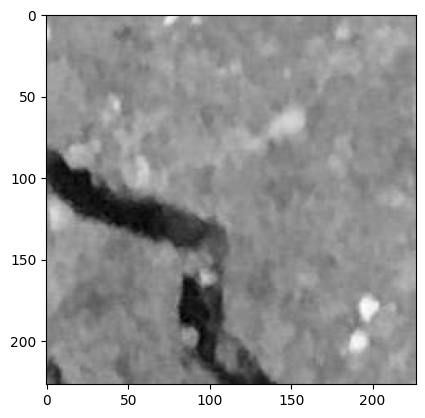

In [ ]:
img = cv2.imread('Positive/15000_1.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

In [ ]:
img.shape

(227, 227)

Load Images with Cracks (resize to 32x32)

In [ ]:
img_size = 64
cracks_data = []
path = '/content/Positive'
class_num = 1
for img in os.listdir(path):
  try:
    img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    resized_arr = cv2.resize(img_arr, (img_size, img_size))
    cracks_data.append([resized_arr, class_num])
  except Exception as e:
    print(e)

cracks_data = np.array(cracks_data)

<ipython-input-7-b130e6f6b48b>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cracks_data = np.array(cracks_data)


Load Images without Cracks

In [ ]:
img_size = 64
no_cracks_data = []
path = '/content/Negative'
class_num = 0
for img in os.listdir(path):
  try:
    img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    resized_arr = cv2.resize(img_arr, (img_size, img_size))
    no_cracks_data.append([resized_arr, class_num])
  except Exception as e:
    print(e)

no_cracks_data = np.array(no_cracks_data)

<ipython-input-8-0456c8ee520d>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  no_cracks_data = np.array(no_cracks_data)


In [ ]:
#Split Image Data from Label Data
crack_images = cracks_data[:,0]
crack_labels = cracks_data[:,-1]
no_crack_images = no_cracks_data[:,0]
no_crack_labels = no_cracks_data[:,-1]

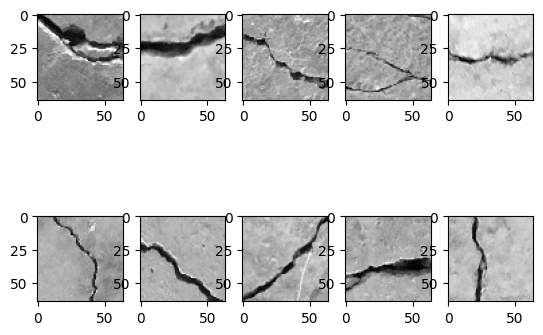

In [ ]:
#display Last 10 images with cracks
for i in range(19990,20000):
  plt.subplot(2, 5, i-19989)
  plt.imshow(crack_images[i], cmap='gray')

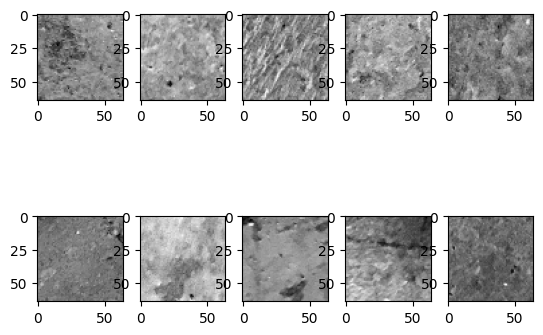

In [ ]:
#display Last 10 images without cracks
for i in range(19990,20000):
  plt.subplot(2, 5, i-19989)
  plt.imshow(no_crack_images[i], cmap='gray')

In [ ]:
img_data = np.concatenate((crack_images,no_crack_images))

In [ ]:
img_labels = np.concatenate((crack_labels,no_crack_labels))

In [ ]:
img_data.shape

(40000,)

##Prepare Data for Training

In [ ]:
#Target Label Text Descriptions
class_names = ['No Cracks', 'Cracked']

In [ ]:
from sklearn.model_selection import train_test_split
#Split into train/test
X_train, X_test, y_train, y_test = train_test_split(img_data, img_labels, test_size=0.2, random_state=43, stratify=img_labels)

In [ ]:
len(y_test)

8000

In [ ]:
pd.Series(y_test).value_counts()

1    4000
0    4000
dtype: int64

In [ ]:
X_train.shape

(32000,)

In [ ]:
X_test.shape

(8000,)

In [ ]:
X_train[0].shape

(64, 64)

In [ ]:
x = []
for i in X_train:
  x.append(i)

X_train = np.array(x)
X_train.shape

(32000, 64, 64)

In [ ]:
x = []
for i in X_test:
  x.append(i)

X_test = np.array(x)
X_test.shape

(8000, 64, 64)

In [ ]:
y = []
for i in y_train:
  y.append(i)

y_train = np.array(y)
y_train.shape

(32000,)

In [ ]:
y = []
for i in y_test:
  y.append(i)

y_test = np.array(y)
y_test.shape

(8000,)

In [ ]:
#normalize data scaling values from 0-1
X_train = X_train/255
X_test = X_test/255

##Apply ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(64,64)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 10s 5ms/step - loss: 0.5494 - accuracy: 0.7281
Epoch 2/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.4442 - accuracy: 0.7886
Epoch 3/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.4018 - accuracy: 0.8158
Epoch 4/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.3683 - accuracy: 0.8363
Epoch 5/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.3365 - accuracy: 0.8597


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

250/250 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90      4000
           1       0.98      0.79      0.88      4000

    accuracy                           0.89      8000
   macro avg       0.90      0.89      0.89      8000
weighted avg       0.90      0.89      0.89      8000



##Basic CNN (1 convolutional layer, 2 connected layers)

In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64,1)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 9s 3ms/step - loss: 0.2654 - accuracy: 0.9438
Epoch 2/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0869 - accuracy: 0.9884
Epoch 3/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0501 - accuracy: 0.9900
Epoch 4/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0283 - accuracy: 0.9923
Epoch 5/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0193 - accuracy: 0.9947


In [ ]:
cnn.evaluate(X_test,y_test)

250/250 [==============================] - 1s 2ms/step - loss: 0.0305 - accuracy: 0.9908


[0.030495015904307365, 0.9907500147819519]

In [ ]:
y_pred = cnn.predict(X_test)

250/250 [==============================] - 1s 2ms/step


In [ ]:
y_predicted_classes = [np.argmax(element) for element in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_predicted_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4000
           1       1.00      0.98      0.99      4000

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000



In [ ]:
cm = confusion_matrix(y_test, y_predicted_classes)

import plotly.express as px
fig = px.imshow(cm, text_auto=True, title='Confusion Matrix: Concrete Crack Prediction')
fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual")

##Basic CNN Same as above (1 convolutional layer, 2 connected layers)
Running again to check for reproducability

In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64,1)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 5s 4ms/step - loss: 0.6948 - accuracy: 0.4983
Epoch 2/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6932 - accuracy: 0.4997
Epoch 3/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6932 - accuracy: 0.5014
Epoch 4/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.6932 - accuracy: 0.4979
Epoch 5/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.6932 - accuracy: 0.5006


In [ ]:
cnn.evaluate(X_test,y_test)

250/250 [==============================] - 1s 4ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932529807090759, 0.5]

In [ ]:
y_pred = cnn.predict(X_test)

250/250 [==============================] - 1s 5ms/step


In [ ]:
y_predicted_classes = [np.argmax(element) for element in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_predicted_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      4000
           1       0.00      0.00      0.00      4000

    accuracy                           0.50      8000
   macro avg       0.25      0.50      0.33      8000
weighted avg       0.25      0.50      0.33      8000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
cm = confusion_matrix(y_test, y_predicted_classes)

import plotly.express as px
fig = px.imshow(cm, text_auto=True, title='Confusion Matrix: Concrete Crack Prediction')
fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual")

This model is predicting all images as No Crack. We will make the model more complex to improve this.

##CNN (2 Convolutional Layers, 2 Connected Layers)

In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64,1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 8s 6ms/step - loss: 0.0817 - accuracy: 0.9706
Epoch 2/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0463 - accuracy: 0.9868
Epoch 3/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0412 - accuracy: 0.9880
Epoch 4/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0331 - accuracy: 0.9903
Epoch 5/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0240 - accuracy: 0.9927


In [ ]:
cnn.evaluate(X_test,y_test)

250/250 [==============================] - 1s 3ms/step - loss: 0.0211 - accuracy: 0.9933


[0.02114621363580227, 0.9932500123977661]

In [ ]:
y_pred = cnn.predict(X_test)

250/250 [==============================] - 1s 3ms/step


In [ ]:
y_predicted_classes = [np.argmax(element) for element in y_pred]

In [ ]:
def plot_sample_predicted(index):
    plt.figure(figsize = (15,2))
    plt.imshow(X_test[index],cmap='gray')
    plt.xlabel(f'Actual Class: {class_names[y_test[index]]}')
    plt.ylabel(f'Predicted Class: {class_names[y_predicted_classes[index]]}')

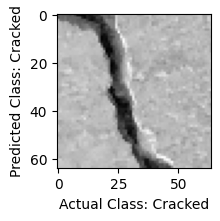

In [ ]:
plot_sample_predicted(3)

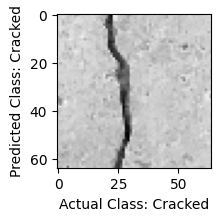

In [ ]:
plot_sample_predicted(7900)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_predicted_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4000
           1       1.00      0.99      0.99      4000

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000



In [ ]:
cm = confusion_matrix(y_test, y_predicted_classes)

import plotly.express as px
fig = px.imshow(cm, text_auto=True, title='Confusion Matrix: Concrete Crack Prediction')
fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual")

##CNN (3 Convolutional Layers, 2 Connected Layers)

In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(64, 64,1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')   #softmax normilized the probability
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 6s 4ms/step - loss: 0.0717 - accuracy: 0.9741
Epoch 2/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0362 - accuracy: 0.9878
Epoch 3/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0221 - accuracy: 0.9922
Epoch 4/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0181 - accuracy: 0.9944
Epoch 5/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0140 - accuracy: 0.9959


In [ ]:
cnn.evaluate(X_test,y_test)

250/250 [==============================] - 1s 3ms/step - loss: 0.0142 - accuracy: 0.9956


[0.014179853722453117, 0.9956250190734863]

In [ ]:
y_pred = cnn.predict(X_test)

250/250 [==============================] - 1s 2ms/step


In [ ]:
y_predicted_classes = [np.argmax(element) for element in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_predicted_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4000
           1       1.00      0.99      1.00      4000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [ ]:
cm = confusion_matrix(y_test, y_predicted_classes)

import plotly.express as px
fig = px.imshow(cm, text_auto=True, title='Confusion Matrix: Concrete Crack Prediction')
fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual")

##CNN (3 Convolutional Layers, 3 Connected Layers)

In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(64, 64,1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')   #softmax normilized the probability
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 6s 4ms/step - loss: 0.0711 - accuracy: 0.9736
Epoch 2/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0348 - accuracy: 0.9885
Epoch 3/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0247 - accuracy: 0.9922
Epoch 4/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0179 - accuracy: 0.9941
Epoch 5/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0131 - accuracy: 0.9961


In [ ]:
cnn.evaluate(X_test,y_test)

250/250 [==============================] - 1s 3ms/step - loss: 0.0100 - accuracy: 0.9970


[0.00997248012572527, 0.996999979019165]

In [ ]:
y_pred = cnn.predict(X_test)

250/250 [==============================] - 1s 2ms/step


In [ ]:
y_predicted_classes = [np.argmax(element) for element in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_predicted_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00      4000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [ ]:
cm = confusion_matrix(y_test, y_predicted_classes)

import plotly.express as px
fig = px.imshow(cm, text_auto=True, title='Confusion Matrix: Concrete Crack Prediction')
fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual")

##CNN (4 Convolutional Layers, 2 Connected Layers)

In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(64, 64,1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')   #softmax normilized the probability
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 7s 5ms/step - loss: 0.0700 - accuracy: 0.9763
Epoch 2/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0353 - accuracy: 0.9882
Epoch 3/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0247 - accuracy: 0.9917
Epoch 4/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0153 - accuracy: 0.9949
Epoch 5/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0108 - accuracy: 0.9965


In [ ]:
cnn.evaluate(X_test,y_test)

250/250 [==============================] - 1s 3ms/step - loss: 0.0098 - accuracy: 0.9966


[0.009764155372977257, 0.9966250061988831]

In [ ]:
y_pred = cnn.predict(X_test)

250/250 [==============================] - 1s 2ms/step


In [ ]:
y_predicted_classes = [np.argmax(element) for element in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_predicted_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00      4000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [ ]:
cm = confusion_matrix(y_test, y_predicted_classes)

import plotly.express as px
fig = px.imshow(cm, text_auto=True, title='Confusion Matrix: Concrete Crack Prediction')
fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual")

##CNN (4 Convolutional Layers, 3 Connected Layers)

In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(64, 64,1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')   #softmax normilized the probability
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 8s 6ms/step - loss: 0.0666 - accuracy: 0.9781
Epoch 2/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0343 - accuracy: 0.9885
Epoch 3/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0222 - accuracy: 0.9929
Epoch 4/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0163 - accuracy: 0.9949
Epoch 5/5
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0111 - accuracy: 0.9964


In [ ]:
cnn.evaluate(X_test,y_test)

250/250 [==============================] - 1s 3ms/step - loss: 0.0171 - accuracy: 0.9955


[0.01705329492688179, 0.9955000281333923]

In [ ]:
y_pred = cnn.predict(X_test)

250/250 [==============================] - 1s 2ms/step


In [ ]:
y_predicted_classes = [np.argmax(element) for element in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_predicted_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4000
           1       1.00      0.99      1.00      4000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [ ]:
cm = confusion_matrix(y_test, y_predicted_classes)

import plotly.express as px
fig = px.imshow(cm, text_auto=True, title='Confusion Matrix: Concrete Crack Prediction')
fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual")

##Choose CNN with 4 Convolutional Layers, 2 Connected Layers and optimize

In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

In [ ]:
# Use 10% (4000 images, or 12.5% of current x_train data) for validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=seed_value)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Early stopping callback based on validation accuracy
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)
# Model checkpoint callback to save the best model
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(64, 64,1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')   #softmax normilized the probability
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Model training with early stopping and saving best model
history = cnn.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
766/766 [==============================] - ETA: 0s - loss: 0.0675 - accuracy: 0.9768
Epoch 1: val_accuracy improved from -inf to 0.98971, saving model to best_model.h5
766/766 [==============================] - 43s 7ms/step - loss: 0.0675 - accuracy: 0.9768 - val_loss: 0.0411 - val_accuracy: 0.9897
Epoch 2/50
  9/766 [..............................] - ETA: 4s - loss: 0.0413 - accuracy: 0.9896

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



763/766 [============================>.] - ETA: 0s - loss: 0.0333 - accuracy: 0.9885
Epoch 2: val_accuracy did not improve from 0.98971
766/766 [==============================] - 5s 6ms/step - loss: 0.0334 - accuracy: 0.9885 - val_loss: 0.0549 - val_accuracy: 0.9823
Epoch 3/50
757/766 [============================>.] - ETA: 0s - loss: 0.0271 - accuracy: 0.9901
Epoch 3: val_accuracy improved from 0.98971 to 0.99171, saving model to best_model.h5
766/766 [==============================] - 4s 5ms/step - loss: 0.0272 - accuracy: 0.9902 - val_loss: 0.0264 - val_accuracy: 0.9917
Epoch 4/50
759/766 [============================>.] - ETA: 0s - loss: 0.0235 - accuracy: 0.9922
Epoch 4: val_accuracy did not improve from 0.99171
766/766 [==============================] - 4s 5ms/step - loss: 0.0233 - accuracy: 0.9922 - val_loss: 0.0247 - val_accuracy: 0.9917
Epoch 5/50
761/766 [============================>.] - ETA: 0s - loss: 0.0134 - accuracy: 0.9959
Epoch 5: val_accuracy improved from 0.99171 to

Look at evaluation of model

In [ ]:
# Evaluate on val set
val_loss, val_accuracy = cnn.evaluate(X_val, y_val)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_accuracy)

110/110 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9954
Validation loss: 0.0180827546864748
Validation accuracy: 0.9954285621643066


In [ ]:
# Evaluate on test set
test_loss, test_accuracy = cnn.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

250/250 [==============================] - 1s 3ms/step - loss: 0.0109 - accuracy: 0.9970
Test loss: 0.010854174382984638
Test accuracy: 0.996999979019165


Load model from best epoch

In [ ]:
best_model = tf.keras.models.load_model('best_model.h5')

In [ ]:
# Evaluate on val set
val_loss, val_accuracy = best_model.evaluate(X_val, y_val)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_accuracy)

110/110 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9963
Validation loss: 0.016037821769714355
Validation accuracy: 0.9962857365608215


In [ ]:
# Evaluate on test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

250/250 [==============================] - 1s 4ms/step - loss: 0.0091 - accuracy: 0.9974
Test loss: 0.00906140636652708
Test accuracy: 0.9973750114440918


In [ ]:
y_pred = best_model.predict(X_test)

250/250 [==============================] - 1s 2ms/step


In [ ]:
y_predicted_classes = [np.argmax(element) for element in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_predicted_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00      4000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [ ]:
cm = confusion_matrix(y_test, y_predicted_classes)

import plotly.express as px
fig = px.imshow(cm, text_auto=True, title='Confusion Matrix: Concrete Crack Prediction')
fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual")

Let's export this best_model for grayscale images so we can load it later without retraining

In [ ]:
import shutil

# Define the paths for local file and Google Drive destination
local_file_path = 'best_model.h5'  # Replace with your local file path
drive_file_path = '/content/drive/MyDrive/605 NLP and CNN Projects/grayscale_best_model.h5'  # Destination in your Drive

# Copy the file to Google Drive
shutil.copy(local_file_path, drive_file_path)

'/content/drive/MyDrive/605 NLP and CNN Projects/grayscale_best_model.h5'

#Next explore use of Edge Detection using Sobel and Canny on Grayscale images
See if this image manipulation provides improvement to model

#3 - Use Sobel and Canny edge detection to develop CNN predictive model for detecting cracks in concrete

##Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q keras
import keras

In [ ]:
! unzip '/content/drive/MyDrive/605 NLP and CNN Projects/ConcreteImages.zip'


Streaming output truncated to the last 5000 lines.
  inflating: Positive/15001_1.jpg    
  inflating: Positive/15002_1.jpg    
  inflating: Positive/15003_1.jpg    
  inflating: Positive/15004_1.jpg    
  inflating: Positive/15005_1.jpg    
  inflating: Positive/15006_1.jpg    
  inflating: Positive/15007_1.jpg    
  inflating: Positive/15008_1.jpg    
  inflating: Positive/15009_1.jpg    
  inflating: Positive/15010_1.jpg    
  inflating: Positive/15011_1.jpg    
  inflating: Positive/15012_1.jpg    
  inflating: Positive/15013_1.jpg    
  inflating: Positive/15014_1.jpg    
  inflating: Positive/15015_1.jpg    
  inflating: Positive/15016_1.jpg    
  inflating: Positive/15017_1.jpg    
  inflating: Positive/15018_1.jpg    
  inflating: Positive/15019_1.jpg    
  inflating: Positive/15020_1.jpg    
  inflating: Positive/15021_1.jpg    
  inflating: Positive/15022_1.jpg    
  inflating: Positive/15023_1.jpg    
  inflating: Positive/15024_1.jpg    
  inflating: Positive/15025_1.jpg    

##View Data and Save image data and labels in numpy arrays

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read in one image and display

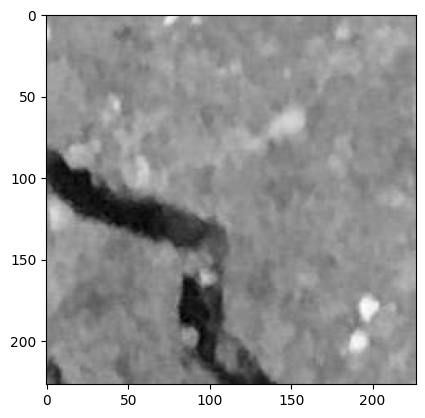

In [ ]:
img = cv2.imread('Positive/15000_1.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

In [ ]:
img.shape

(227, 227)

Load Images with Cracks (resize to 64x64)

In [ ]:
img_size = 64
cracks_data = []
path = '/content/Positive'
class_num = 1
for img in os.listdir(path):
  try:
    img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    resized_arr = cv2.resize(img_arr, (img_size, img_size))
    cracks_data.append([resized_arr, class_num])
  except Exception as e:
    print(e)

cracks_data = np.array(cracks_data)

<ipython-input-7-b130e6f6b48b>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cracks_data = np.array(cracks_data)


Load Images without Cracks

In [ ]:
img_size = 64
no_cracks_data = []
path = '/content/Negative'
class_num = 0
for img in os.listdir(path):
  try:
    img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    resized_arr = cv2.resize(img_arr, (img_size, img_size))
    no_cracks_data.append([resized_arr, class_num])
  except Exception as e:
    print(e)

no_cracks_data = np.array(no_cracks_data)

<ipython-input-8-0456c8ee520d>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  no_cracks_data = np.array(no_cracks_data)


In [ ]:
#Split Image Data from Label Data
crack_images = cracks_data[:,0]
crack_labels = cracks_data[:,-1]
no_crack_images = no_cracks_data[:,0]
no_crack_labels = no_cracks_data[:,-1]

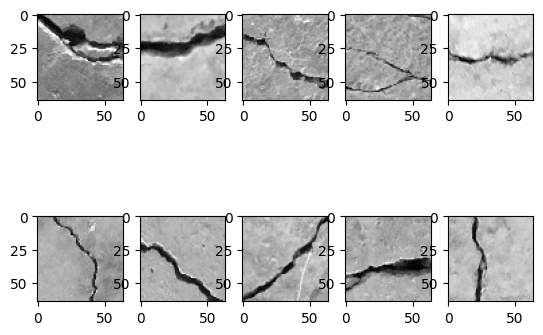

In [ ]:
#display Last 10 images with cracks
for i in range(19990,20000):
  plt.subplot(2, 5, i-19989)
  plt.imshow(crack_images[i], cmap='gray')

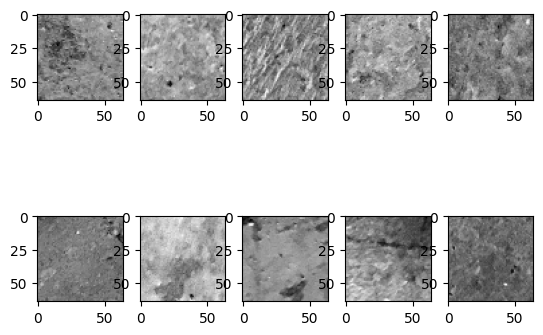

In [ ]:
#display Last 10 images without cracks
for i in range(19990,20000):
  plt.subplot(2, 5, i-19989)
  plt.imshow(no_crack_images[i], cmap='gray')

In [ ]:
img_data = np.concatenate((crack_images,no_crack_images))

In [ ]:
img_labels = np.concatenate((crack_labels,no_crack_labels))

In [ ]:
img_data.shape

(40000,)

##Explore use of Sobel and Canny Edge Detection

Perform on a few images to view canny/sobel images

In [ ]:
def view_sobel_and_canny(index):
  # sobel operations and its magnitudes
  sobelx = cv2.Sobel(img_data[index], cv2.CV_64F, 1, 0)
  sobely = cv2.Sobel(img_data[index], cv2.CV_64F, 0, 1)
  sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx, 2.0), 1.0, cv2.pow(sobely, 2.0), 1.0, 0.0))

  # Canny edge detection
  threshold1 = 200
  threshold2 = 200
  canny = cv2.Canny(img_data[index], threshold1, threshold2)

  #View
  plt.figure(figsize=(6, 10));
  plt.subplot(1, 3, 1); plt.title('Input image'); plt.axis('off');
  plt.imshow(img_data[index], cmap='gray');
  plt.subplot(1, 3, 2); plt.title('Sobel Intensity'); plt.axis('off');
  plt.imshow(sobel, cmap='gray')
  plt.subplot(1, 3, 3); plt.title('Canny'); plt.axis('off');
  plt.imshow(cv2.absdiff(sobely, 0.0), cmap='gray');


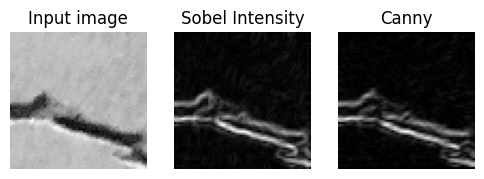

In [ ]:
view_sobel_and_canny(3)

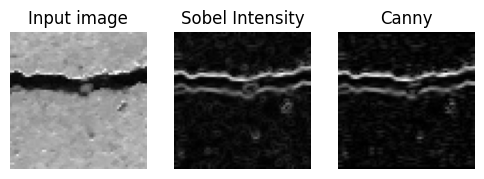

In [ ]:
view_sobel_and_canny(551)

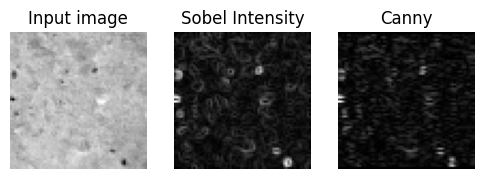

In [ ]:
view_sobel_and_canny(28001)

##Prepare Data for Training with Sobel Intensity Images

In [ ]:
#Target Label Text Descriptions
class_names = ['No Cracks', 'Cracked']

In [ ]:
sobel_img_data = []
for index in range(len(img_data)):
  # sobel operations and its magnitudes
  sobelx = cv2.Sobel(img_data[index], cv2.CV_64F, 1, 0)
  sobely = cv2.Sobel(img_data[index], cv2.CV_64F, 0, 1)
  sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx, 2.0), 1.0, cv2.pow(sobely, 2.0), 1.0, 0.0))
  sobel_img_data.append(sobel)
sobel_img_data = np.array(sobel_img_data)


check that new data array is same length and shape as previous data array

In [ ]:
len(img_data)

40000

In [ ]:
len(sobel_img_data)

40000

In [ ]:
img_data.shape

(40000,)

In [ ]:
sobel_img_data.shape

(40000, 64, 64)

We can leave shape this way, we won't need to convert the shape later as we did previously

In [ ]:
from sklearn.model_selection import train_test_split
#Split into train/test
X_train, X_test, y_train, y_test = train_test_split(sobel_img_data, img_labels, test_size=0.2, random_state=43, stratify=img_labels)

In [ ]:
len(y_test)

8000

In [ ]:
pd.Series(y_test).value_counts()

1    4000
0    4000
dtype: int64

In [ ]:
X_train.shape

(32000, 64, 64)

In [ ]:
X_test.shape

(8000, 64, 64)

In [ ]:
x = []
for i in X_train:
  x.append(i)

X_train = np.array(x)
X_train.shape

(32000, 64, 64)

In [ ]:
x = []
for i in X_test:
  x.append(i)

X_test = np.array(x)
X_test.shape

(8000, 64, 64)

In [ ]:
y = []
for i in y_train:
  y.append(i)

y_train = np.array(y)
y_train.shape

(32000,)

In [ ]:
y = []
for i in y_test:
  y.append(i)

y_test = np.array(y)
y_test.shape

(8000,)

In [ ]:
#normalize data scaling values from 0-1
X_train = X_train/255
X_test = X_test/255

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


##Choose CNN with 4 Convolutional Layers, 2 Connected Layers and optimize with use of Sobel Images

In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

In [ ]:
# Use 10% (4000 images, or 12.5% of current x_train data) for validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=seed_value)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Early stopping callback based on validation accuracy
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)
# Model checkpoint callback to save the best model
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

In [3]:
cnn = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(64, 64,1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')   #softmax normilized the probability
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Model training with early stopping and saving best model
history = cnn.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
874/875 [============================>.] - ETA: 0s - loss: 0.0549 - accuracy: 0.9792
Epoch 1: val_accuracy improved from -inf to 0.99000, saving model to best_model.h5
875/875 [==============================] - 17s 6ms/step - loss: 0.0549 - accuracy: 0.9792 - val_loss: 0.0265 - val_accuracy: 0.9900
Epoch 2/50
 26/875 [..............................] - ETA: 3s - loss: 0.0117 - accuracy: 0.9976

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


866/875 [============================>.] - ETA: 0s - loss: 0.0188 - accuracy: 0.9939
Epoch 2: val_accuracy improved from 0.99000 to 0.99275, saving model to best_model.h5
875/875 [==============================] - 4s 5ms/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.0170 - val_accuracy: 0.9927
Epoch 3/50
872/875 [============================>.] - ETA: 0s - loss: 0.0149 - accuracy: 0.9948
Epoch 3: val_accuracy improved from 0.99275 to 0.99675, saving model to best_model.h5
875/875 [==============================] - 5s 6ms/step - loss: 0.0150 - accuracy: 0.9948 - val_loss: 0.0107 - val_accuracy: 0.9967
Epoch 4/50
874/875 [============================>.] - ETA: 0s - loss: 0.0118 - accuracy: 0.9961
Epoch 4: val_accuracy did not improve from 0.99675
875/875 [==============================] - 5s 6ms/step - loss: 0.0118 - accuracy: 0.9960 - val_loss: 0.0282 - val_accuracy: 0.9900
Epoch 5/50
869/875 [============================>.] - ETA: 0s - loss: 0.0082 - accuracy: 0.9976
Epoch 5: va

Look at evaluation of model

In [ ]:
# Evaluate on val set
val_loss, val_accuracy = cnn.evaluate(X_val, y_val)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_accuracy)

125/125 [==============================] - 1s 4ms/step - loss: 0.0202 - accuracy: 0.9973
Validation loss: 0.02021312713623047
Validation accuracy: 0.9972500205039978


In [ ]:
# Evaluate on test set
test_loss, test_accuracy = cnn.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

250/250 [==============================] - 1s 4ms/step - loss: 0.0250 - accuracy: 0.9973
Test loss: 0.025020046159625053
Test accuracy: 0.9972500205039978


Load model from best epoch

In [ ]:
best_model = tf.keras.models.load_model('best_model.h5')

In [ ]:
# Evaluate on val set
val_loss, val_accuracy = best_model.evaluate(X_val, y_val)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_accuracy)

125/125 [==============================] - 1s 4ms/step - loss: 0.0139 - accuracy: 0.9973
Validation loss: 0.013891740702092648
Validation accuracy: 0.9972500205039978


In [ ]:
# Evaluate on test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

250/250 [==============================] - 1s 3ms/step - loss: 0.0136 - accuracy: 0.9974
Test loss: 0.013603029772639275
Test accuracy: 0.9973750114440918


In [ ]:
y_pred = best_model.predict(X_test)

250/250 [==============================] - 1s 5ms/step


In [ ]:
y_predicted_classes = [np.argmax(element) for element in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_predicted_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00      4000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [ ]:
cm = confusion_matrix(y_test, y_predicted_classes)

import plotly.express as px
fig = px.imshow(cm, text_auto=True, title='Confusion Matrix: Concrete Crack Prediction')
fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual")

Let's export this best_model for grayscale images so we can load it later without retraining

In [ ]:
import shutil

# Define the paths for local file and Google Drive destination
local_file_path = 'best_model.h5'  # Replace with your local file path
drive_file_path = '/content/drive/MyDrive/605 NLP and CNN Projects/sobel_grayscale_best_model.h5'  # Destination in your Drive

# Copy the file to Google Drive
shutil.copy(local_file_path, drive_file_path)

'/content/drive/MyDrive/605 NLP and CNN Projects/sobel_grayscale_best_model.h5'

##Prepare Data for Training with Canny Images

In [ ]:
#Target Label Text Descriptions
class_names = ['No Cracks', 'Cracked']

In [ ]:
canny_img_data = []
threshold1 = 200
threshold2 = 200
for index in range(len(img_data)):
  # Canny edge detection
  canny = cv2.Canny(img_data[index], threshold1, threshold2)

  canny_img_data.append(sobel)

canny_img_data = np.array(canny_img_data)


check that new data array is same length and shape as previous data array

In [ ]:
len(img_data)

40000

In [ ]:
len(canny_img_data)

40000

In [ ]:
img_data.shape

(40000,)

In [ ]:
canny_img_data.shape

(40000, 64, 64)

In [ ]:
from sklearn.model_selection import train_test_split
#Split into train/test
X_train, X_test, y_train, y_test = train_test_split(sobel_img_data, img_labels, test_size=0.2, random_state=43, stratify=img_labels)

In [ ]:
len(y_test)

8000

In [ ]:
pd.Series(y_test).value_counts()

1    4000
0    4000
dtype: int64

In [ ]:
X_train.shape

(32000, 64, 64)

In [ ]:
X_test.shape

(8000, 64, 64)

In [ ]:
x = []
for i in X_train:
  x.append(i)

X_train = np.array(x)
X_train.shape

(32000, 64, 64)

In [ ]:
x = []
for i in X_test:
  x.append(i)

X_test = np.array(x)
X_test.shape

(8000, 64, 64)

In [ ]:
y = []
for i in y_train:
  y.append(i)

y_train = np.array(y)
y_train.shape

(32000,)

In [ ]:
y = []
for i in y_test:
  y.append(i)

y_test = np.array(y)
y_test.shape

(8000,)

In [ ]:
#normalize data scaling values from 0-1
X_train = X_train/255
X_test = X_test/255

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


## Choose CNN with 4 Convolutional Layers, 2 Connected Layers and optimize with use of Canny Images

In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

In [ ]:
# Use 10% (4000 images, or 12.5% of current x_train data) for validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=seed_value)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Early stopping callback based on validation accuracy
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)
# Model checkpoint callback to save the best model
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(64, 64,1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')   #softmax normilized the probability
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Model training with early stopping and saving best model
history = cnn.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
869/875 [============================>.] - ETA: 0s - loss: 0.0564 - accuracy: 0.9781
Epoch 1: val_accuracy improved from -inf to 0.98975, saving model to best_model.h5
875/875 [==============================] - 10s 9ms/step - loss: 0.0561 - accuracy: 0.9781 - val_loss: 0.0269 - val_accuracy: 0.9898
Epoch 2/50
  9/875 [..............................] - ETA: 5s - loss: 0.0160 - accuracy: 0.9896 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



874/875 [============================>.] - ETA: 0s - loss: 0.0195 - accuracy: 0.9935
Epoch 2: val_accuracy improved from 0.98975 to 0.99300, saving model to best_model.h5
875/875 [==============================] - 7s 8ms/step - loss: 0.0195 - accuracy: 0.9935 - val_loss: 0.0168 - val_accuracy: 0.9930
Epoch 3/50
866/875 [============================>.] - ETA: 0s - loss: 0.0152 - accuracy: 0.9948
Epoch 3: val_accuracy improved from 0.99300 to 0.99675, saving model to best_model.h5
875/875 [==============================] - 4s 5ms/step - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0121 - val_accuracy: 0.9967
Epoch 4/50
873/875 [============================>.] - ETA: 0s - loss: 0.0124 - accuracy: 0.9955
Epoch 4: val_accuracy did not improve from 0.99675
875/875 [==============================] - 4s 5ms/step - loss: 0.0126 - accuracy: 0.9954 - val_loss: 0.0242 - val_accuracy: 0.9933
Epoch 5/50
872/875 [============================>.] - ETA: 0s - loss: 0.0097 - accuracy: 0.9970
Epoch 5: va

Look at evaluation of model

In [ ]:
# Evaluate on val set
val_loss, val_accuracy = cnn.evaluate(X_val, y_val)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_accuracy)

125/125 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.9960
Validation loss: 0.016205135732889175
Validation accuracy: 0.9959999918937683


In [ ]:
# Evaluate on test set
test_loss, test_accuracy = cnn.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

250/250 [==============================] - 1s 4ms/step - loss: 0.0175 - accuracy: 0.9969
Test loss: 0.01751677319407463
Test accuracy: 0.996874988079071


Load model from best epoch

In [ ]:
best_model = tf.keras.models.load_model('best_model.h5')

In [ ]:
# Evaluate on val set
val_loss, val_accuracy = best_model.evaluate(X_val, y_val)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_accuracy)

125/125 [==============================] - 1s 3ms/step - loss: 0.0121 - accuracy: 0.9967
Validation loss: 0.012119519524276257
Validation accuracy: 0.996749997138977


In [ ]:
# Evaluate on test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

250/250 [==============================] - 1s 3ms/step - loss: 0.0126 - accuracy: 0.9959
Test loss: 0.012622859328985214
Test accuracy: 0.9958750009536743


In [ ]:
y_pred = best_model.predict(X_test)

250/250 [==============================] - 1s 3ms/step


In [ ]:
y_predicted_classes = [np.argmax(element) for element in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_predicted_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4000
           1       0.99      1.00      1.00      4000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [ ]:
cm = confusion_matrix(y_test, y_predicted_classes)

import plotly.express as px
fig = px.imshow(cm, text_auto=True, title='Confusion Matrix: Concrete Crack Prediction')
fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual")

Let's export this best_model for grayscale images with canny edge detection so we can load it later without retraining

In [ ]:
import shutil

# Define the paths for local file and Google Drive destination
local_file_path = 'best_model.h5'  # Replace with your local file path
drive_file_path = '/content/drive/MyDrive/605 NLP and CNN Projects/canny_grayscale_best_model.h5'  # Destination in your Drive

# Copy the file to Google Drive
shutil.copy(local_file_path, drive_file_path)

'/content/drive/MyDrive/605 NLP and CNN Projects/canny_grayscale_best_model.h5'

Visualize the architecture of the best model (Sobel)

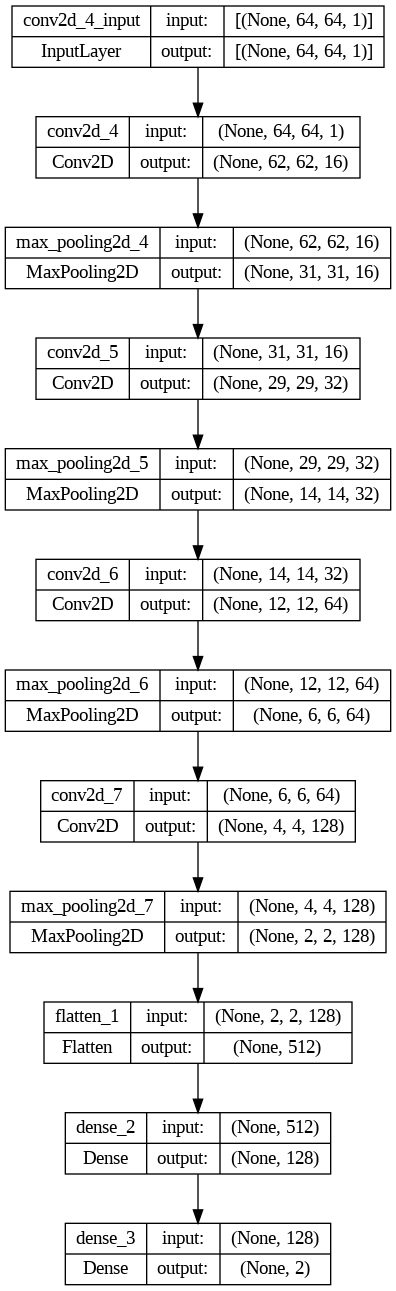

In [4]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models

# Define your CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

# Visualize the model architecture
plot_model(cnn, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)

#Next look at applying the best (Sobel) model to new data including images and videos
A predictive model such as this could applied in detecting surface defects that need to be addressed. This could likely be useful in city and roadway construction.

#4 - Apply the Best Model (Sobel) to predict presence of Cracks in other images and videos of concrete

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import shutil

# Define the paths for local file and Google Drive destination
local_file_path = 'sobel_model.h5'
drive_file_path = '/content/drive/MyDrive/605 NLP and CNN Projects/sobel_grayscale_best_model.h5'

# Copy the saved model from Google Drive
shutil.copy(drive_file_path, local_file_path)

#import the model
sobel_model = models.load_model(local_file_path)

# Define the paths for local file and Google Drive destination
local_file_path = 'grayscale_model.h5'
drive_file_path = '/content/drive/MyDrive/605 NLP and CNN Projects/grayscale_best_model.h5'

# Copy the saved model from Google Drive
shutil.copy(drive_file_path, local_file_path)

#import the model
gray_model = models.load_model(local_file_path)

In [ ]:
def get_file_paths():
  file_type = input("Enter the type of input (video/image/videos/images): ")

  if file_type.lower() in ['video','image']:
    file_path = input(f"Enter the path to the {file_type}: ")

    if os.path.exists(file_path):
      return [file_path], file_type.lower()
    else:
      print("Invalid File Path")
      return None

  elif file_type.lower() in ['videos','images']:
    folder_path = input(f"Enter the path to a folder containing only those {file_type}: ")

    if os.path.exists(folder_path):
      file_paths=[]
      for filename in os.listdir(folder_path):
        file_paths.append(os.path.join(folder_path, filename))
      return file_paths, file_type.lower()
    else:
      print("Invalid Folder Path")
      return None

  else:
    print("Invalid Input")
    return None

In [ ]:
def get_frames_from_video(video_path):
    vid_cap = cv2.VideoCapture(video_path)
    frames = []

    while True:
        success, image = vid_cap.read()
        if not success:
            break
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(gray_image, (64, 64))
        frames.append(resized_image)

    vid_cap.release()
    return np.array(frames)

In [ ]:
def concretecrackclassification():
  file_paths, file_type = get_file_paths()
  if file_type in ['image','images']:
    imgs = []
    for index in range(len(file_paths)):
      imgs.append(cv2.resize(cv2.imread(file_paths[index], cv2.IMREAD_GRAYSCALE),(64,64)))
    imgs = np.array(imgs)

    sobel_imgs = []
    for index in range(len(imgs)):
      # sobel operations and its magnitudes
      sobelx = cv2.Sobel(imgs[index], cv2.CV_64F, 1, 0)
      sobely = cv2.Sobel(imgs[index], cv2.CV_64F, 0, 1)
      sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx, 2.0), 1.0, cv2.pow(sobely, 2.0), 1.0, 0.0))
      sobel_imgs.append(sobel)
    sobel_imgs = np.array(sobel_imgs)

    #normalize data scaling values from 0-1
    X = sobel_imgs/255

    #Perform Prediction
    y_pred = sobel_model.predict(X)
    y_predicted_classes = [np.argmax(element) for element in y_pred]
    if file_type == 'images':
      crack_img_indices = []
      predictions=[]
      for index in range(len(y_predicted_classes)):
        if y_predicted_classes[index]==1:
          crack_img_indices.append(index)
      if len(crack_img_indices) > 0:
        crack_images = []
        for index in crack_img_indices:
          crack_images.append(file_paths[index])
        prediction = f"The following images display cracked concrete: {crack_images}"
      else:
        predictions.append(f"No Crack recognized in {image_path}")
    else:
      if 1 in y_predicted_classes:
        predictions.append(f"Crack recognized in {image_path}")
      else:
        predictions.append(f"No Crack recognized in {image_path}")


  elif file_type in ['video', 'videos']:
    predictions = []
    for video_path in file_paths:
      frames = get_frames_from_video(video_path)
      if len(frames) == 0:
        print(f"No frames extracted from {video_path}")
        predictions.append(f"No frames extracted from {video_path}")
        continue

      sobel_frames = []
      for frame in frames:
          sobelx = cv2.Sobel(frame, cv2.CV_64F, 1, 0)
          sobely = cv2.Sobel(frame, cv2.CV_64F, 0, 1)
          sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx, 2.0), 1.0, cv2.pow(sobely, 2.0), 1.0, 0.0))
          sobel_frames.append(sobel)

      X_video = np.array(sobel_frames) / 255
      y_pred_video = sobel_model.predict(X_video)
      y_predicted_classes_video = [np.argmax(element) for element in y_pred_video]

      if 1 in y_predicted_classes_video:
          predictions.append(f"Crack recognized in {video_path}")
      else:
          predictions.append(f"No crack recognized in {video_path}")

  return predictions

In [ ]:
def concretecrackclassification():
  file_paths, file_type = get_file_paths()
  if file_type in ['image','images']:
    imgs = []
    predictions=[]
    for index in range(len(file_paths)):
      imgs.append(cv2.resize(cv2.imread(file_paths[index], cv2.IMREAD_GRAYSCALE),(64,64)))
    imgs = np.array(imgs)

    sobel_imgs = []
    for index in range(len(imgs)):
      # sobel operations and its magnitudes
      sobelx = cv2.Sobel(imgs[index], cv2.CV_64F, 1, 0)
      sobely = cv2.Sobel(imgs[index], cv2.CV_64F, 0, 1)
      sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx, 2.0), 1.0, cv2.pow(sobely, 2.0), 1.0, 0.0))
      sobel_imgs.append(sobel)
    sobel_imgs = np.array(sobel_imgs)

    #normalize data scaling values from 0-1
    X = sobel_imgs/255

    #Perform Prediction
    y_pred = sobel_model.predict(X)
    y_predicted_classes = [np.argmax(element) for element in y_pred]

    #Print appropriate response based on predictions
    if file_type == 'images':
      for index in range(len(y_predicted_classes)):
        image_name = os.path.basename(file_paths[index])
        if y_predicted_classes[index]==1:
          predictions.append(f"Crack recognized in {image_name}")
        else:
          predictions.append(f"No Crack recognized in {image_name}")
    elif file_type == 'image':
      image_name = os.path.basename(file_paths[0])
      if 1 in y_predicted_classes:
        predictions.append(f"Crack recognized in {image_name}")
      else:
        predictions.append(f"No Crack recognized in {image_name}")


  elif file_type in ['video', 'videos']:
    predictions = []
    for video_path in file_paths:
      video_name = os.path.basename(video_path)
      frames = get_frames_from_video(video_path)
      if len(frames) == 0:
        print(f"No frames extracted from {video_name}")
        predictions.append(f"No frames extracted from {video_name}")
        continue

      sobel_frames = []
      for frame in frames:
          sobelx = cv2.Sobel(frame, cv2.CV_64F, 1, 0)
          sobely = cv2.Sobel(frame, cv2.CV_64F, 0, 1)
          sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx, 2.0), 1.0, cv2.pow(sobely, 2.0), 1.0, 0.0))
          sobel_frames.append(sobel)

      X_video = np.array(sobel_frames) / 255
      y_pred_video = sobel_model.predict(X_video)
      y_predicted_classes_video = [np.argmax(element) for element in y_pred_video]

      if 1 in y_predicted_classes_video:
          predictions.append(f"Crack recognized in {video_name}")
      else:
          predictions.append(f"No crack recognized in {video_name}")

  return predictions

Try concrete crack classification with images outside those in collected train/test sets. These images are cropped from images taken of concrete cylinders used as compressive strength samples.

In [ ]:
concretecrackclassification()

Enter the type of input (video/image/videos/images): images
Enter the path to a folder containing only those images: /content/drive/MyDrive/605 NLP and CNN Projects/images
1/1 [==============================] - 0s 28ms/step


['No Crack recognized in nocrack1.jpg',
 'Crack recognized in cracks1.jpg',
 'Crack recognized in cracks3.jpg',
 'No Crack recognized in nocrack3.jpg',
 'Crack recognized in cracks2.jpg',
 'No Crack recognized in nocrack2.jpg']

In [ ]:
concretecrackclassification()

Enter the type of input (video/image/videos/images): image
Enter the path to the image: /content/drive/MyDrive/605 NLP and CNN Projects/images/cracks1.jpg
1/1 [==============================] - 0s 24ms/step


['Crack recognized in cracks1.jpg']

In [ ]:
concretecrackclassification()

Enter the type of input (video/image/videos/images): image
Enter the path to the image: /content/drive/MyDrive/605 NLP and CNN Projects/images/nocrack2.jpg
1/1 [==============================] - 0s 23ms/step


['No Crack recognized in nocrack2.jpg']

Try with videos taken of sidewalk pathway

In [ ]:
concretecrackclassification()

Enter the type of input (video/image/videos/images): video
Enter the path to the video: /content/drive/MyDrive/605 NLP and CNN Projects/videos/cracksvid2.mp4
4/4 [==============================] - 0s 27ms/step


['Crack recognized in cracksvid2.mp4']

In [ ]:
concretecrackclassification()

Enter the type of input (video/image/videos/images): video
Enter the path to the video: /content/drive/MyDrive/605 NLP and CNN Projects/videos/nocracksvid2.mp4
5/5 [==============================] - 0s 25ms/step


['No crack recognized in nocracksvid2.mp4']

In [ ]:
concretecrackclassification()

Enter the type of input (video/image/videos/images): videos
Enter the path to a folder containing only those videos: /content/drive/MyDrive/605 NLP and CNN Projects/videos
4/4 [==============================] - 0s 30ms/step


['No crack recognized in nocracksvid2.mp4',
 'No crack recognized in nocracksvid1.mp4',
 'No crack recognized in cracksvid1.mp4',
 'Crack recognized in cracksvid2.mp4']

#Conclusions

Predictive model seems to apply quite well to other photos. Performs ok on video, but in order to improve this it would likely be good to in the future look at using larger image size (shrinking images and video frames to 64x64 could significantly decrease image quality to a point of reducing our model effectiveness)

A predictive model such as this could applied in detecting surface defects that need to be addressed. For example a city could use video of sidewalks (although more development would be needed since sidewalks are built in sections and division would likely be recognized as a crack) or roads to identify areas that are failing and need repair.
Additionally I could see a similar model to this being useful in construction of paved roadways. Currently surface defects at the completion of paving are generally done manually (walking the roadway after paving). A system like this could greatly reduce manual workload of this.